# Gravity Forward Modeling

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In this tutorial we will create a model of a gravity anomaly that we can adjust to match some data collected with a Sintrex CG-5 gravimeter. 

Our first step is to define a function that takes the model parameters as input and calculates and returns the predicted gravity data as output. 

In [7]:
# using spherical mass anomaly first
def gravity_sph(dM, z, x):
    '''Calculate predicted gravity anomaly from a spherical mass anomaly'''
    G = 6.6743e-11 # gravity constant
    
    dist_factor = np.power(np.square(x) + np.square(z), 1.5)
    
    return G * z * dM / dist_factor


# Now same thing but using a density anomaly
def gravity_drho(drho,R,z,x):
    dM = 4*drho*np.power(R,3)*np.pi/3
    return gravity_sph(dM,z,x)

Now that we have a model for predicting gravity data, let's create some fake data to see what various types of anomalies look like. 

In [8]:
# Observation points
x = np.linspace(-100,100,1000)

In [9]:
g_a_1 = gravity_drho(1,  1, 20, x) # reference
g_a_2 = gravity_drho(2,  1, 20, x) # denser
g_a_3 = gravity_drho(0.5,1, 20, x) # lighter
g_a_4 = gravity_drho(1,  2, 40, x) # bigger, deeper
g_a_5 = gravity_drho(3,  1, 40, x) # denser, deeper

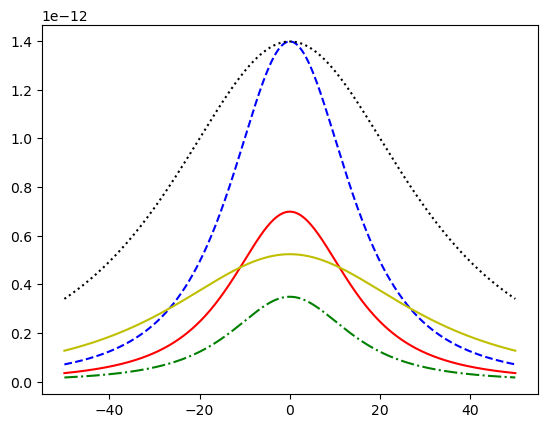

In [10]:
plt.plot(x,g_a_1, 'r')
plt.plot(x,g_a_2, 'b--')
plt.plot(x,g_a_3, 'g-.')
plt.plot(x,g_a_4, 'k:')
plt.plot(x,g_a_5, 'y')